# Spike Challenge - Oscar Mauriaca

In [1]:
import numpy as np
import pandas as pd
import sklearn
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt
import warnings
warnings.simplefilter('ignore')

In [2]:
# Cargamos nuestra data 
data = pd.read_csv('caudal_extra.csv')
#Ordenamos nuestros datos
data['fecha'] = pd.to_datetime(data['fecha'])
data.sort_values(['codigo_estacion', 'fecha'], inplace=True)
print('Data.shape: ', data.shape)

Data.shape:  (1411180, 17)


# 2.-  Analiza el dataset caudal_extra.csv

In [3]:
data.head(10)

,Unnamed: 0,codigo_estacion,institucion,fuente,nombre,altura,latitud,longitud,codigo_cuenca,nombre_sub_cuenca,cantidad_observaciones,fecha,caudal,gauge_id,gauge_name,precip_promedio,temp_max_promedio
90656,90656,1020003,DGA,dga_web,Rio Lauca En Estancia El Lago,4370,-18.2325,-69.331902,10,Rio Lauca,15268,1963-04-01 00:00:00+00:00,0.284,1020003,Rio Lauca En Estancia El Lago,0.075,NaN
88201,88201,1020003,DGA,dga_web,Rio Lauca En Estancia El Lago,4370,-18.2325,-69.331902,10,Rio Lauca,15268,1963-04-02 00:00:00+00:00,0.320,1020003,Rio Lauca En Estancia El Lago,0.875,NaN
88700,88700,1020003,DGA,dga_web,Rio Lauca En Estancia El Lago,4370,-18.2325,-69.331902,10,Rio Lauca,15268,1963-04-03 00:00:00+00:00,0.398,1020003,Rio Lauca En Estancia El Lago,0.050,NaN
88462,88462,1020003,DGA,dga_web,Rio Lauca En Estancia El Lago,4370,-18.2325,-69.331902,10,Rio Lauca,15268,1963-04-04 00:00:00+00:00,0.422,1020003,Rio Lauca En Estancia El Lago,0.375,NaN
96534,96534,1020003,DGA,dga_web,Rio Lauca En Estancia El Lago,4370,-18.2325,-69.331902,10,Rio Lauca,15268,1963-04-05 00:00:00+00:00,0.370,1020003,Rio Lauca En Estancia El Lago,2.750,NaN
97536,97536,1020003,DGA,dga_web,Rio Lauca En Estancia El Lago,4370,-18.2325,-69.331902,10,Rio Lauca,15268,1963-04-06 00:00:00+00:00,0.467,1020003,Rio Lauca En Estancia El Lago,5.500,NaN
95797,95797,1020003,DGA,dga_web,Rio Lauca En Estancia El Lago,4370,-18.2325,-69.331902,10,Rio Lauca,15268,1963-04-07 00:00:00+00:00,0.288,1020003,Rio Lauca En Estancia El Lago,0.250,NaN
98057,98057,1020003,DGA,dga_web,Rio Lauca En Estancia El Lago,4370,-18.2325,-69.331902,10,Rio Lauca,15268,1963-04-08 00:00:00+00:00,0.184,1020003,Rio Lauca En Estancia El Lago,0.000,NaN
93092,93092,1020003,DGA,dga_web,Rio Lauca En Estancia El Lago,4370,-18.2325,-69.331902,10,Rio Lauca,15268,1963-04-09 00:00:00+00:00,0.162,1020003,Rio Lauca En Estancia El Lago,0.000,NaN
91381,91381,1020003,DGA,dga_web,Rio Lauca En Estancia El Lago,4370,-18.2325,-69.331902,10,Rio Lauca,15268,1963-04-10 00:00:00+00:00,0.160,1020003,Rio Lauca En Estancia El Lago,0.000,NaN


In [4]:
data.tail(10)

,Unnamed: 0,codigo_estacion,institucion,fuente,nombre,altura,latitud,longitud,codigo_cuenca,nombre_sub_cuenca,cantidad_observaciones,fecha,caudal,gauge_id,gauge_name,precip_promedio,temp_max_promedio
46675,46675,12876004,DGA,dga_web,Rio Catalina En Pampa Guanacos,0,-54.0411,-68.797501,128,Afluentes Rio Grande Y Cuencas Cerradas,1475,2016-08-22 00:00:00+00:00,1.070,12876004,Rio Catalina En Pampa Guanacos,0.4,6.7
14805,14805,12876004,DGA,dga_web,Rio Catalina En Pampa Guanacos,0,-54.0411,-68.797501,128,Afluentes Rio Grande Y Cuencas Cerradas,1475,2016-08-23 00:00:00+00:00,1.400,12876004,Rio Catalina En Pampa Guanacos,0.1,7.6
40494,40494,12876004,DGA,dga_web,Rio Catalina En Pampa Guanacos,0,-54.0411,-68.797501,128,Afluentes Rio Grande Y Cuencas Cerradas,1475,2016-08-24 00:00:00+00:00,1.250,12876004,Rio Catalina En Pampa Guanacos,0.9,4.0
38034,38034,12876004,DGA,dga_web,Rio Catalina En Pampa Guanacos,0,-54.0411,-68.797501,128,Afluentes Rio Grande Y Cuencas Cerradas,1475,2016-08-25 00:00:00+00:00,1.060,12876004,Rio Catalina En Pampa Guanacos,0.2,9.6
17189,17189,12876004,DGA,dga_web,Rio Catalina En Pampa Guanacos,0,-54.0411,-68.797501,128,Afluentes Rio Grande Y Cuencas Cerradas,1475,2016-08-26 00:00:00+00:00,1.010,12876004,Rio Catalina En Pampa Guanacos,0.1,4.4
50385,50385,12876004,DGA,dga_web,Rio Catalina En Pampa Guanacos,0,-54.0411,-68.797501,128,Afluentes Rio Grande Y Cuencas Cerradas,1475,2016-08-27 00:00:00+00:00,0.948,12876004,Rio Catalina En Pampa Guanacos,0.0,9.0
38035,38035,12876004,DGA,dga_web,Rio Catalina En Pampa Guanacos,0,-54.0411,-68.797501,128,Afluentes Rio Grande Y Cuencas Cerradas,1475,2016-08-28 00:00:00+00:00,1.000,12876004,Rio Catalina En Pampa Guanacos,3.0,4.9
55184,55184,12876004,DGA,dga_web,Rio Catalina En Pampa Guanacos,0,-54.0411,-68.797501,128,Afluentes Rio Grande Y Cuencas Cerradas,1475,2016-08-29 00:00:00+00:00,1.880,12876004,Rio Catalina En Pampa Guanacos,0.4,8.9
30893,30893,12876004,DGA,dga_web,Rio Catalina En Pampa Guanacos,0,-54.0411,-68.797501,128,Afluentes Rio Grande Y Cuencas Cerradas,1475,2016-08-30 00:00:00+00:00,2.000,12876004,Rio Catalina En Pampa Guanacos,0.3,3.3
45405,45405,12876004,DGA,dga_web,Rio Catalina En Pampa Guanacos,0,-54.0411,-68.797501,128,Afluentes Rio Grande Y Cuencas Cerradas,1475,2016-08-31 00:00:00+00:00,1.310,12876004,Rio Catalina En Pampa Guanacos,0.0,6.8


In [3]:
data.describe()

,Unnamed: 0,codigo_estacion,altura,latitud,longitud,codigo_cuenca,cantidad_observaciones,caudal,gauge_id,precip_promedio,temp_max_promedio
count,1.411180e+06,1.411180e+06,1.411180e+06,1.411180e+06,1.411180e+06,1.411180e+06,1.411180e+06,1.411180e+06,1.411180e+06,1.383413e+06,1.259617e+06
mean,7.055895e+05,6.279953e+06,5.855691e+02,-3.367748e+01,-7.121826e+01,6.255881e+01,1.573983e+04,9.552229e+01,6.279953e+06,1.921009e+00,1.921110e+01
std,4.073727e+05,2.891695e+06,8.652682e+02,6.940820e+00,1.174363e+00,2.839921e+01,7.545197e+03,2.526337e+02,2.891695e+06,7.361936e+00,7.307081e+00
min,0.000000e+00,1.020003e+06,0.000000e+00,-5.404110e+01,-7.328330e+01,1.000000e+01,8.020000e+02,0.000000e+00,1.020003e+06,0.000000e+00,-1.905000e+01
25%,3.527948e+05,4.320001e+06,4.500000e+01,-3.721190e+01,-7.206810e+01,4.300000e+01,1.025500e+04,1.250000e+00,4.320001e+06,0.000000e+00,1.370000e+01
50%,7.055895e+05,5.734001e+06,3.950000e+02,-3.359390e+01,-7.125470e+01,5.700000e+01,1.488900e+04,8.950000e+00,5.734001e+06,0.000000e+00,1.908429e+01
75%,1.058384e+06,8.308000e+06,7.500000e+02,-2.994580e+01,-7.053280e+01,8.300000e+01,2.061100e+04,6.970000e+01,8.308000e+06,0.000000e+00,2.520000e+01
max,1.411179e+06,1.287600e+07,4.370000e+03,-1.823250e+01,-6.814390e+01,1.280000e+02,3.666700e+04,1.580500e+04,1.287600e+07,2.586000e+02,4.150000e+01


In [4]:
data.isnull().sum()

Unnamed: 0                     0
codigo_estacion                0
institucion                    0
fuente                         0
nombre                         0
altura                         0
latitud                        0
longitud                       0
codigo_cuenca                  0
nombre_sub_cuenca              0
cantidad_observaciones         0
fecha                          0
caudal                         0
gauge_id                       0
gauge_name                     0
precip_promedio            27767
temp_max_promedio         151563
dtype: int64

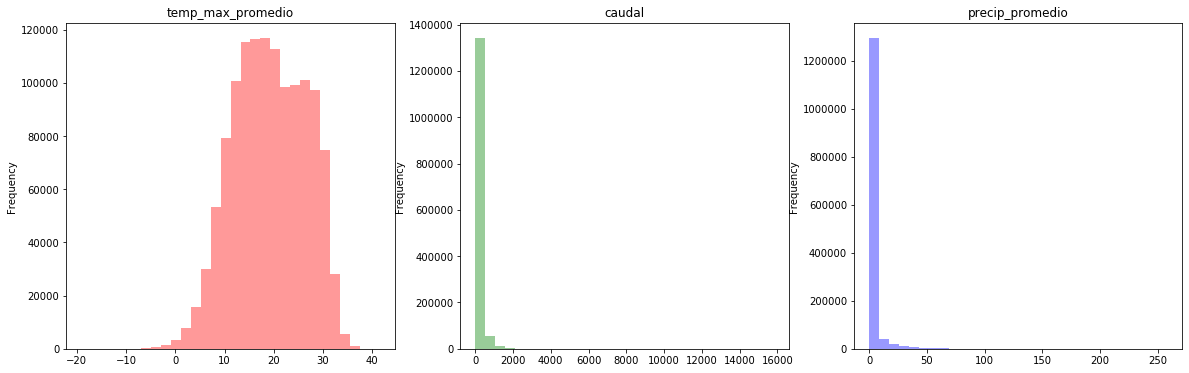

In [5]:
fig = plt.figure(figsize=(20,6))
fig.add_subplot(131)
data["temp_max_promedio"].plot(kind='hist', color="red", alpha=0.4, bins=30, title = 'temp_max_promedio')


fig.add_subplot(132)
data["caudal"].plot(kind='hist', color="g", alpha=0.4 , bins=30, title = 'caudal')


fig.add_subplot(133)
data["precip_promedio"].plot(kind='hist', color="b", alpha=0.4, bins=30, title = 'precip_promedio')


### Análisis: 

- A simple vista no hay problema con los datos más allá de que faltan en precip_promedio y en temp_max_promedio. Esto se debe a como se conformaron los datos (faltan estaciones de medición de temperatura y/o precipitación), se hace la suposición que los datos faltantes son únicamente por faltas de estaciones de medición y no por fallas en estaciones existentes debido a condiciones extremas.

- Si analizamos la tabla de arriba (data.describe()) podemos ver que todas las columnas tienen valores razonables según sus propias unidades. Viendo la tabla y los graficos de la temperatura, caudal y precipitación en ningún momento toman valores extraordinarios que nos hagan pensar que los datos están erróneos o sucios.


# 3.- Plots de precipitación, temperatura y caudal

In [8]:
def time_plot_una_estacion(codigo_estacion, columna, fecha_min, fecha_max):
    # Filtramos por estación de medición
    est = data[data['codigo_estacion']==codigo_estacion]
    # Utilizamos solo las fechas entre la min y max
    mask = (est['fecha'] >= fecha_min) & (est['fecha'] <= fecha_max)
    est = est.loc[mask]
    est = est.sort_values('fecha')
    est = est.set_index('fecha')
    est[columna].plot(figsize = (16,6), legend = True, title = 'Estacion [{}]'.format(codigo_estacion))
    #est[columna].rolling(25).mean().plot()
    

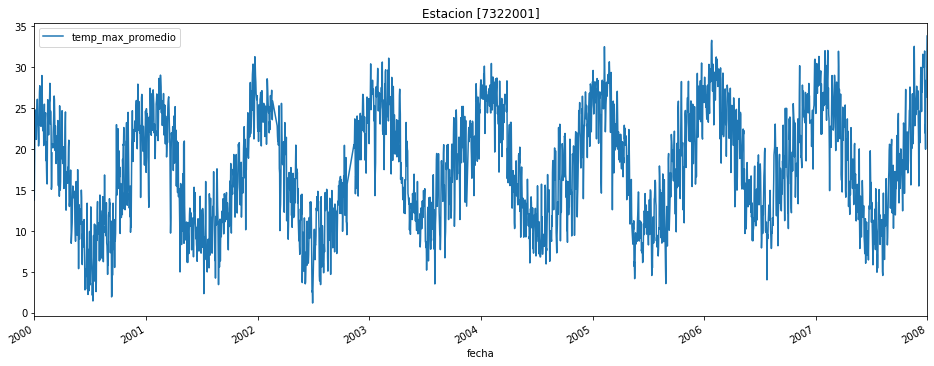

In [9]:
time_plot_una_estacion(7322001,  'temp_max_promedio',  '2000' , '2008')

In [10]:
def time_plot_estaciones_varias_columnas(codigo_estacion, columnas, fecha_min, fecha_max):
    # Filtramos por estación de medición
    est = data[data['codigo_estacion']==codigo_estacion]
    # Utilizamos solo las fechas entre la min y max
    mask = (est['fecha'] >= fecha_min) & (est['fecha'] <= fecha_max)
    est = est.loc[mask]
    est = est.sort_values('fecha')
    est = est.set_index('fecha')
    est[['temp_max_promedio','precip_promedio', 'caudal']] = MinMaxScaler().fit_transform(est[['temp_max_promedio','caudal','precip_promedio']])
    for i in columnas: 
        est[i].plot(figsize = (16,6), legend = True, title = 'Estación [{}]. Gráfico normalizado (MinMaxScaler)'.format(codigo_estacion))  
    

### Uso: 
Opción 1:

columnas = ("caudal", "precip_promedio", "temp_max_promedio")

time_plot_estaciones_varias_columnas(11335002, columnas , '2017-01-01' , '2017-07-30')

Opción 2:

time_plot_estaciones_varias_columnas(11335002, ['caudal', 'precip_promedio'] , '2017-01-01' , '2017-07-30')


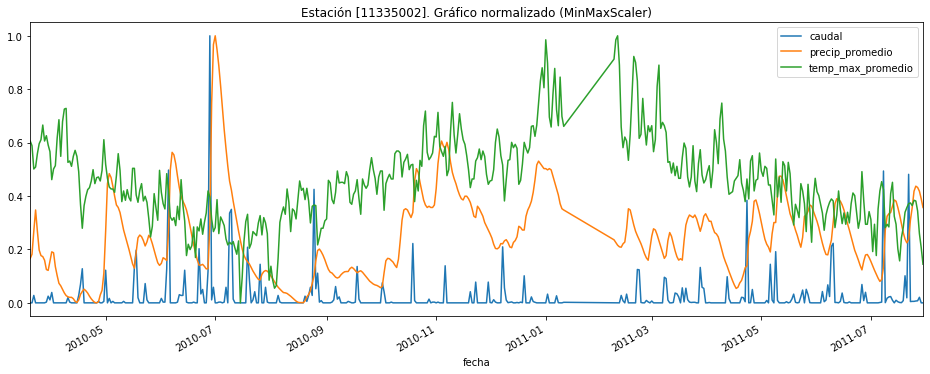

In [11]:
columnas = ("caudal", "precip_promedio", "temp_max_promedio")
time_plot_estaciones_varias_columnas(11335002, columnas , '2010-01-01' , '2011-07-30')

# 4.- Variables extremas

In [6]:
#Creamos nueva columna para indicar que la estación del año (season) correspondiente a cada fila
data['Seasons']=""
# Tomamos unicamente el mes desde la fecha
data['Seasons'] = data['fecha'].dt.month
#Por simplicidad supondremos que los cambios de estación se hacen al comienzo del mes.
season = ['verano', 'verano', 'verano', 'otoño', 'otoño', 'otoño', 'invierno', 'invierno', 'invierno', 'primavera', 'primavera', 'primavera']
# Creamos un diccionario que convierta los meses en las estaciones
month_to_season = dict(zip(range(1,13), season))
data['Seasons'] = data['Seasons'].map(month_to_season)
# Observamos nueva columna 'Seasons'
data.head()


,Unnamed: 0,codigo_estacion,institucion,fuente,nombre,altura,latitud,longitud,codigo_cuenca,nombre_sub_cuenca,cantidad_observaciones,fecha,caudal,gauge_id,gauge_name,precip_promedio,temp_max_promedio,Seasons
90656,90656,1020003,DGA,dga_web,Rio Lauca En Estancia El Lago,4370,-18.2325,-69.331902,10,Rio Lauca,15268,1963-04-01 00:00:00+00:00,0.284,1020003,Rio Lauca En Estancia El Lago,0.075,NaN,otoño
88201,88201,1020003,DGA,dga_web,Rio Lauca En Estancia El Lago,4370,-18.2325,-69.331902,10,Rio Lauca,15268,1963-04-02 00:00:00+00:00,0.320,1020003,Rio Lauca En Estancia El Lago,0.875,NaN,otoño
88700,88700,1020003,DGA,dga_web,Rio Lauca En Estancia El Lago,4370,-18.2325,-69.331902,10,Rio Lauca,15268,1963-04-03 00:00:00+00:00,0.398,1020003,Rio Lauca En Estancia El Lago,0.050,NaN,otoño
88462,88462,1020003,DGA,dga_web,Rio Lauca En Estancia El Lago,4370,-18.2325,-69.331902,10,Rio Lauca,15268,1963-04-04 00:00:00+00:00,0.422,1020003,Rio Lauca En Estancia El Lago,0.375,NaN,otoño
96534,96534,1020003,DGA,dga_web,Rio Lauca En Estancia El Lago,4370,-18.2325,-69.331902,10,Rio Lauca,15268,1963-04-05 00:00:00+00:00,0.370,1020003,Rio Lauca En Estancia El Lago,2.750,NaN,otoño


In [7]:
sub = data.groupby(['codigo_estacion', 'Seasons'])[['caudal', 'precip_promedio', 'temp_max_promedio']].quantile(.95)
sub.columns = ['caudal95', 'precip95', 'temp95']
# Con esto tenemos el valor de corte para cada variable, para cada estación del año y estación de medición.
sub

caudal95   precip95     temp95
codigo_estacion Seasons                                  
1020003         invierno     0.1990   0.000000  14.000000
                otoño        0.1990   1.107000  14.373750
                primavera    0.1246   4.116000  16.782001
                verano       1.7650  10.645000  15.891000
1021001         invierno     2.6300   0.000000  14.000000
...                             ...        ...        ...
12289002        verano     164.0000   4.966667  23.299999
12876004        invierno     9.7800   8.375000  10.400000
                otoño        5.3600   6.000000  13.420000
                primavera    7.9800   5.600000  17.200001
                verano       0.9648   6.380000  19.799999

[532 rows x 3 columns]

In [8]:
# Agregamos las columnas de quantile 95 al df original, evitando los duplicados _x, _y

data = data.merge(sub, left_on = ['codigo_estacion', 'Seasons'], right_index=True, suffixes=('_x', '_y'))

In [9]:
# Creamos las nuevas columnas de variables extremas y remplazamos con 1's y 0's 
data['caudal_extremo'] = (data['caudal'] > data['caudal95'])*1
data['precip_extremo'] = (data['precip_promedio'] > data['precip95'])*1
data['temp_extremo']   = (data['temp_max_promedio'] > data['temp95'])*1
#Ya no necesitamos las columnas auxiliares precip95, caudal95 y temp95
data.drop(sub.columns, inplace=True, axis=1)
data.head()

,Unnamed: 0,codigo_estacion,institucion,fuente,nombre,altura,latitud,longitud,codigo_cuenca,nombre_sub_cuenca,...,fecha,caudal,gauge_id,gauge_name,precip_promedio,temp_max_promedio,Seasons,caudal_extremo,precip_extremo,temp_extremo
90656,90656,1020003,DGA,dga_web,Rio Lauca En Estancia El Lago,4370,-18.2325,-69.331902,10,Rio Lauca,...,1963-04-01 00:00:00+00:00,0.284,1020003,Rio Lauca En Estancia El Lago,0.075,NaN,otoño,1,0,0
88201,88201,1020003,DGA,dga_web,Rio Lauca En Estancia El Lago,4370,-18.2325,-69.331902,10,Rio Lauca,...,1963-04-02 00:00:00+00:00,0.320,1020003,Rio Lauca En Estancia El Lago,0.875,NaN,otoño,1,0,0
88700,88700,1020003,DGA,dga_web,Rio Lauca En Estancia El Lago,4370,-18.2325,-69.331902,10,Rio Lauca,...,1963-04-03 00:00:00+00:00,0.398,1020003,Rio Lauca En Estancia El Lago,0.050,NaN,otoño,1,0,0
88462,88462,1020003,DGA,dga_web,Rio Lauca En Estancia El Lago,4370,-18.2325,-69.331902,10,Rio Lauca,...,1963-04-04 00:00:00+00:00,0.422,1020003,Rio Lauca En Estancia El Lago,0.375,NaN,otoño,1,0,0
96534,96534,1020003,DGA,dga_web,Rio Lauca En Estancia El Lago,4370,-18.2325,-69.331902,10,Rio Lauca,...,1963-04-05 00:00:00+00:00,0.370,1020003,Rio Lauca En Estancia El Lago,2.750,NaN,otoño,1,1,0


### Análisis: 

- Es razonable definir como extremo algo que se encuentra sobre el percentil 95. El problema cae en como se construye esta variable, ya que al calcular por estación de medición y por estación del año un valor único de corte (que identifica si un evento es extremo o no) lo hacemos desde la fecha de inicio a la fecha final para dicha estación de medición. Esto implica que al momento de calcular si un día 'x' de verano es extremo o no, usaremos información de todos los veranos disponibles para esa estación de medición, incluyendo los del futuro al día 'x'. Si el caudal fuese en aumento según los veranos, al momento de calcular el percentil 95 total, el caudal de corte extremo aumentó y caudales que sí serían extremos en el pasado estarian siendo clasificados como no extremos.

- Propuesta: Mantener el percentil 95 como medida de evento extremo, pero solo utilizando datos del pasado, hasta una cantidad fija de años (ej: solo ver 5 inviernos hacia atrás para calcular).



# 5.- Análisis caudal_extremo

In [10]:
print('Cantidad de estaciones de medicion :', len(data.codigo_estacion.unique()) )
print('Cantidad de cuencas :', len(data.codigo_cuenca.unique()))
print('Cantidad de sub_cuencas :', len(data.nombre_sub_cuenca.unique()))

Cantidad de estaciones de medicion : 133
Cantidad de cuencas : 29
Cantidad de sub_cuencas : 78


Por la forma en que está pensada la variable 'caudal_extremo', debiese tener igual comportamiento según la estación de medición, ya que por definición un 95% de los datos serán 0 (no extremo) y un 5% será 1 (extremo). Como se observa en las celdas anteriores, existen más estaciones de medición que cantidad de cuencas, por lo que podría existir pequeñas variaciones según la cuenca. Veremos en la siguiente tabla que el % de eventos extremos se mantiene en el orden del 5%.



In [11]:
extremos = []
total_datos = []
contador_ext = []
fecha_min = []
fecha_max = []


for i in data.codigo_cuenca.unique():
    nuevo = data[data['codigo_cuenca']==i][['codigo_cuenca', 'caudal_extremo', 'fecha']]
    # Muestre solo año-mes-dia
    nuevo["fecha"]=nuevo["fecha"].dt.date
    fecha_min.append(nuevo['fecha'].iloc[0])
    fecha_max.append(nuevo['fecha'].iloc[-1])
    total_datos.append(int(nuevo[['caudal_extremo']].count()))
    contador_ext.append(int(nuevo[['caudal_extremo']].sum()))
    extremos.append(100* int(nuevo[['caudal_extremo']].sum())/int(nuevo[['caudal_extremo']].count()))

del nuevo
df = pd.DataFrame({'codigo_cuenca': data.codigo_cuenca.unique()})
df['% Extremo'] = extremos
df['Cantidad de datos extremos'] = contador_ext
df['Datos Totales'] = total_datos
df['Fecha Inicio'] = fecha_min
df['Fecha Final']  = fecha_max
df = df.set_index('codigo_cuenca')
df

,% Extremo,Cantidad de datos extremos,Datos Totales,Fecha Inicio,Fecha Final
codigo_cuenca,,,,,
10,4.991472,1756,35180,1963-04-01,2016-10-19
12,4.669704,410,8780,1985-01-01,2017-11-15
21,4.924804,3553,72145,1979-10-04,2017-07-31
32,4.946463,2393,48378,1964-03-13,2016-11-24
34,4.996402,3749,75034,1960-01-02,2017-03-31
38,4.960896,4269,86053,1964-12-07,1997-06-30
43,4.988659,4025,80683,1960-01-02,2016-11-04
45,4.993882,5755,115241,1960-01-20,2016-12-19
47,4.994404,4150,83093,1960-01-02,2017-12-31


Otro análisis posible sobre esta variable sería ver cómo cambia con respecto al tiempo, pero eso se puede ver en el siguiente ítem. También podría ser un análisis valido encontrar cuencas 'similares', es decir, con cantidad de datos y fechas de inicio y fin parecidas y luego analizar cómo se comportaron durante el tiempo.

# 6.- Eventos extremos a través del tiempo

In [12]:
# Creamos una nueva columna que capture el año de cada fecha
data['Año'] = data['fecha'].dt.year

In [13]:
# Como son variables binarias, con la media nos basta para saber el porcentaje de eventos extremos por año
df = data.groupby(['Año'])[['caudal_extremo', 'precip_extremo', 'temp_extremo']].mean()

In [14]:
df

,caudal_extremo,precip_extremo,temp_extremo
Año,,,
1960,0.024852,0.017938,0.001303
1961,0.047556,0.033259,0.001622
1962,0.022085,0.017722,0.010997
1963,0.066237,0.053125,0.009591
1964,0.044382,0.023251,0.007208
1965,0.100444,0.048288,0.016693
1966,0.073973,0.034315,0.014521
1967,0.034032,0.031353,0.021907
1968,0.003072,0.016987,0.037172


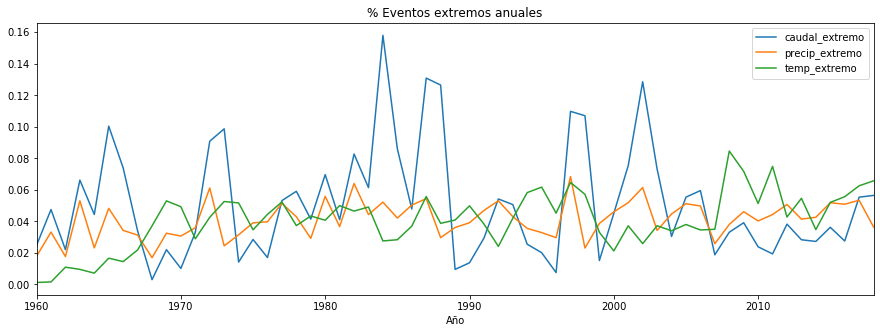

In [15]:
# Graficamos el % de eventos extremos por año
df['caudal_extremo'].plot(legend=True)
df['precip_extremo'].plot(legend=True)
df['temp_extremo'].plot(figsize = (15,5), legend=True, title = '% Eventos extremos anuales')

### Análisis:

- ¿Ha aumentado la frecuencia de olas de calor en Chile? Se puede apreciar una leve tendencia al incremento de porcentaje de eventos extremos anuales con respecto a la temperatura, indicando un aumento de las olas de calor en el país. 
- No es clara una tendencia al aumento de eventos extremos para caudal y precipitaciones.

In [16]:
data = data.drop('fuente', axis=1)
data = data.drop('institucion', axis=1)
data = data.drop('gauge_id', axis=1)
del df

# 7.- Predicción de caudal extremo 



Dependiendo de cómo se desee hacer el modelo, serán los datos que se pueden usar. Los modelos generados en este proyecto intentan predecir condiciones extremas para el día siguiente. Si vamos a predecir el comportamiento del día martes, podremos usar todos los datos que se tengan hasta el día lunes.




Creamos un nuevo dataframe con las columnas útiles para nuestra predicción

In [17]:
# Creamos un nuevo dataframe solo con las columnas de interes
sub = data[['fecha', 'codigo_estacion', 'caudal', 'precip_promedio', 'temp_max_promedio', 'precip_extremo', 'temp_extremo' ,'caudal_extremo']]
sub.reset_index(inplace=True)
del sub['index']
sub

,fecha,codigo_estacion,caudal,precip_promedio,temp_max_promedio,precip_extremo,temp_extremo,caudal_extremo
0,1963-04-01 00:00:00+00:00,1020003,0.284,0.075,NaN,0,0,1
1,1963-04-02 00:00:00+00:00,1020003,0.320,0.875,NaN,0,0,1
2,1963-04-03 00:00:00+00:00,1020003,0.398,0.050,NaN,0,0,1
3,1963-04-04 00:00:00+00:00,1020003,0.422,0.375,NaN,0,0,1
4,1963-04-05 00:00:00+00:00,1020003,0.370,2.750,NaN,1,0,1
...,...,...,...,...,...,...,...,...
1411175,2016-06-26 00:00:00+00:00,12876004,0.489,4.800,9.8,0,0,0
1411176,2016-06-27 00:00:00+00:00,12876004,0.832,3.300,11.4,0,0,0
1411177,2016-06-28 00:00:00+00:00,12876004,0.907,3.500,4.6,0,0,0
1411178,2016-06-29 00:00:00+00:00,12876004,0.904,0.100,3.2,0,0,0


Vamos a crear nuevas variables históricas que ayuden a nuestro modelo. En particular tendremos:

- media de la última semana para: caudal , precip_promedio y temp_max_promedio 
- media del último mes para: caudal , precip_promedio y temp_max_promedio
- Cantidad de eventos extremos en la última semana para : caudal_extremo , precip_extremo y temp_extremo
- Cantidad de eventos extremos en el último mes para : caudal_extremo , precip_extremo y temp_extremo
- Desviación estándar del último mes para: caudal, precip_promedio y temp_max_promedio

In [18]:
sub['caudal_Media7'] = sub.caudal.rolling(7).mean()
sub['precip_Media7'] = sub.precip_promedio.rolling(7).mean()
sub['temp_Media7'] = sub.temp_max_promedio.rolling(7).mean()

In [25]:
sub.head(15)

,fecha,codigo_estacion,caudal,precip_promedio,temp_max_promedio,precip_extremo,temp_extremo,caudal_extremo,caudal_Media7,precip_Media7,temp_Media7
0,1963-04-01 00:00:00+00:00,1020003,0.284,0.075,NaN,0,0,1,NaN,NaN,NaN
1,1963-04-02 00:00:00+00:00,1020003,0.320,0.875,NaN,0,0,1,NaN,NaN,NaN
2,1963-04-03 00:00:00+00:00,1020003,0.398,0.050,NaN,0,0,1,NaN,NaN,NaN
3,1963-04-04 00:00:00+00:00,1020003,0.422,0.375,NaN,0,0,1,NaN,NaN,NaN
4,1963-04-05 00:00:00+00:00,1020003,0.370,2.750,NaN,1,0,1,NaN,NaN,NaN
5,1963-04-06 00:00:00+00:00,1020003,0.467,5.500,NaN,1,0,1,NaN,NaN,NaN
6,1963-04-07 00:00:00+00:00,1020003,0.288,0.250,NaN,0,0,1,0.364143,1.410714,NaN
7,1963-04-08 00:00:00+00:00,1020003,0.184,0.000,NaN,0,0,0,0.349857,1.400000,NaN
8,1963-04-09 00:00:00+00:00,1020003,0.162,0.000,NaN,0,0,0,0.327286,1.275000,NaN
9,1963-04-10 00:00:00+00:00,1020003,0.160,0.000,NaN,0,0,0,0.293286,1.267857,NaN


In [19]:
sub['caudal_Media30'] = sub.caudal.rolling(30).mean()
sub['precip_Media30'] = sub.precip_promedio.rolling(30).mean()
sub['temp_Media30'] = sub.temp_max_promedio.rolling(30).mean()

In [27]:
sub.tail(15)

,fecha,codigo_estacion,caudal,precip_promedio,temp_max_promedio,precip_extremo,temp_extremo,caudal_extremo,caudal_Media7,precip_Media7,temp_Media7,caudal_Media30,precip_Media30,temp_Media30
1411165,2016-06-16 00:00:00+00:00,12876004,0.126,0.8,6.7,0,0,0,0.149000,0.314286,7.300000,0.153267,0.273333,5.956667
1411166,2016-06-17 00:00:00+00:00,12876004,0.126,0.3,7.8,0,0,0,0.145286,0.357143,6.885714,0.153233,0.270000,6.090000
1411167,2016-06-18 00:00:00+00:00,12876004,0.125,0.0,6.7,0,0,0,0.137857,0.357143,6.371429,0.152400,0.270000,6.073333
1411168,2016-06-19 00:00:00+00:00,12876004,0.122,0.5,5.7,0,0,0,0.133143,0.242857,6.314286,0.151500,0.276667,6.010000
1411169,2016-06-20 00:00:00+00:00,12876004,0.112,0.0,7.9,0,0,0,0.127714,0.242857,6.742857,0.150200,0.276667,6.050000
1411170,2016-06-21 00:00:00+00:00,12876004,0.117,0.3,6.4,0,0,0,0.123143,0.285714,6.571429,0.149833,0.286667,6.013333
1411171,2016-06-22 00:00:00+00:00,12876004,0.115,7.9,2.9,1,0,0,0.120429,1.400000,6.300000,0.149167,0.550000,5.850000
1411172,2016-06-23 00:00:00+00:00,12876004,0.376,1.1,5.1,0,0,0,0.156143,1.442857,6.071429,0.157900,0.586667,5.816667
1411173,2016-06-24 00:00:00+00:00,12876004,0.357,1.4,3.1,0,0,0,0.189143,1.600000,5.400000,0.158133,0.626667,5.753333
1411174,2016-06-25 00:00:00+00:00,12876004,0.306,2.2,10.0,0,0,0,0.215000,1.914286,5.871429,0.163500,0.696667,5.953333


In [20]:
sub['precip_ext_acum7'] = sub.precip_extremo.rolling(7).sum()
sub['temp_ext_acum7'] = sub.temp_extremo.rolling(7).sum()
sub['caudal_ext_acum7'] = sub.caudal_extremo.rolling(7).sum()

In [29]:
sub.head(10)

,fecha,codigo_estacion,caudal,precip_promedio,temp_max_promedio,precip_extremo,temp_extremo,caudal_extremo,caudal_Media7,precip_Media7,temp_Media7,caudal_Media30,precip_Media30,temp_Media30,precip_ext_acum7,temp_ext_acum7,caudal_ext_acum7
0,1963-04-01 00:00:00+00:00,1020003,0.284,0.075,NaN,0,0,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1963-04-02 00:00:00+00:00,1020003,0.320,0.875,NaN,0,0,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1963-04-03 00:00:00+00:00,1020003,0.398,0.050,NaN,0,0,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1963-04-04 00:00:00+00:00,1020003,0.422,0.375,NaN,0,0,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1963-04-05 00:00:00+00:00,1020003,0.370,2.750,NaN,1,0,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,1963-04-06 00:00:00+00:00,1020003,0.467,5.500,NaN,1,0,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,1963-04-07 00:00:00+00:00,1020003,0.288,0.250,NaN,0,0,1,0.364143,1.410714,NaN,NaN,NaN,NaN,2.0,0.0,7.0
7,1963-04-08 00:00:00+00:00,1020003,0.184,0.000,NaN,0,0,0,0.349857,1.400000,NaN,NaN,NaN,NaN,2.0,0.0,6.0
8,1963-04-09 00:00:00+00:00,1020003,0.162,0.000,NaN,0,0,0,0.327286,1.275000,NaN,NaN,NaN,NaN,2.0,0.0,5.0
9,1963-04-10 00:00:00+00:00,1020003,0.160,0.000,NaN,0,0,0,0.293286,1.267857,NaN,NaN,NaN,NaN,2.0,0.0,4.0


In [21]:
sub['precip_ext_acum30'] = sub.precip_extremo.rolling(30).sum()
sub['temp_ext_acum30'] = sub.temp_extremo.rolling(30).sum()
sub['caudal_ext_acum30'] = sub.caudal_extremo.rolling(30).sum()

In [22]:
sub['precip_std30'] = sub.precip_promedio.rolling(30).std()
sub['temp_std30'] = sub.temp_max_promedio.rolling(30).std()
sub['caudal_std30'] = sub.caudal.rolling(30).std()

In [33]:
sub.head(10)

,fecha,codigo_estacion,caudal,precip_promedio,temp_max_promedio,precip_extremo,temp_extremo,caudal_extremo,caudal_Media7,precip_Media7,...,temp_Media30,precip_ext_acum7,temp_ext_acum7,caudal_ext_acum7,precip_ext_acum30,temp_ext_acum30,caudal_ext_acum30,precip_std30,temp_std30,caudal_std30
0,1963-04-01 00:00:00+00:00,1020003,0.284,0.075,NaN,0,0,1,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1963-04-02 00:00:00+00:00,1020003,0.320,0.875,NaN,0,0,1,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1963-04-03 00:00:00+00:00,1020003,0.398,0.050,NaN,0,0,1,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1963-04-04 00:00:00+00:00,1020003,0.422,0.375,NaN,0,0,1,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1963-04-05 00:00:00+00:00,1020003,0.370,2.750,NaN,1,0,1,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,1963-04-06 00:00:00+00:00,1020003,0.467,5.500,NaN,1,0,1,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,1963-04-07 00:00:00+00:00,1020003,0.288,0.250,NaN,0,0,1,0.364143,1.410714,...,NaN,2.0,0.0,7.0,NaN,NaN,NaN,NaN,NaN,NaN
7,1963-04-08 00:00:00+00:00,1020003,0.184,0.000,NaN,0,0,0,0.349857,1.400000,...,NaN,2.0,0.0,6.0,NaN,NaN,NaN,NaN,NaN,NaN
8,1963-04-09 00:00:00+00:00,1020003,0.162,0.000,NaN,0,0,0,0.327286,1.275000,...,NaN,2.0,0.0,5.0,NaN,NaN,NaN,NaN,NaN,NaN
9,1963-04-10 00:00:00+00:00,1020003,0.160,0.000,NaN,0,0,0,0.293286,1.267857,...,NaN,2.0,0.0,4.0,NaN,NaN,NaN,NaN,NaN,NaN


### Hacemos un shift para la columna de caudal_extremo. Por lo tanto, ahora cada fila de datos tiene la etiqueta asociada del día siguiente.

In [23]:
sub['caudal_extremo'] = sub['caudal_extremo'].shift(-1)
sub

,fecha,codigo_estacion,caudal,precip_promedio,temp_max_promedio,precip_extremo,temp_extremo,caudal_extremo,caudal_Media7,precip_Media7,...,temp_Media30,precip_ext_acum7,temp_ext_acum7,caudal_ext_acum7,precip_ext_acum30,temp_ext_acum30,caudal_ext_acum30,precip_std30,temp_std30,caudal_std30
0,1963-04-01 00:00:00+00:00,1020003,0.284,0.075,NaN,0,0,1.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1963-04-02 00:00:00+00:00,1020003,0.320,0.875,NaN,0,0,1.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1963-04-03 00:00:00+00:00,1020003,0.398,0.050,NaN,0,0,1.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1963-04-04 00:00:00+00:00,1020003,0.422,0.375,NaN,0,0,1.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1963-04-05 00:00:00+00:00,1020003,0.370,2.750,NaN,1,0,1.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1411175,2016-06-26 00:00:00+00:00,12876004,0.489,4.800,9.8,0,0,0.0,0.267429,2.528571,...,6.180000,1.0,0.0,0.0,1.0,0.0,0.0,1.686648,2.481157,0.092339
1411176,2016-06-27 00:00:00+00:00,12876004,0.832,3.300,11.4,0,0,0.0,0.370286,3.000000,...,6.400000,1.0,0.0,0.0,1.0,0.0,0.0,1.742359,2.641969,0.151343
1411177,2016-06-28 00:00:00+00:00,12876004,0.907,3.500,4.6,0,0,0.0,0.483143,3.457143,...,6.413333,1.0,0.0,0.0,1.0,0.0,0.0,1.804541,2.631472,0.198924
1411178,2016-06-29 00:00:00+00:00,12876004,0.904,0.100,3.2,0,0,0.0,0.595857,2.342857,...,6.253333,0.0,0.0,0.0,1.0,0.0,0.0,1.804541,2.677200,0.234023


In [24]:
sub.isnull().sum()

fecha                     0
codigo_estacion           0
caudal                    0
precip_promedio       27767
temp_max_promedio    151563
precip_extremo            0
temp_extremo              0
caudal_extremo            1
caudal_Media7             6
precip_Media7         29635
temp_Media7          176412
caudal_Media30           29
precip_Media30        36128
temp_Media30         238193
precip_ext_acum7          6
temp_ext_acum7            6
caudal_ext_acum7          6
precip_ext_acum30        29
temp_ext_acum30          29
caudal_ext_acum30        29
precip_std30          36128
temp_std30           238193
caudal_std30             29
dtype: int64

Vemos que además de los missing que existian en el dataframe original, gracias a las agrupaciones temporales hechas anteriormente hemos generado más missing data. Vamos a eliminar todas las filas con algún valor missing en ellas.

In [25]:
sub.dropna(inplace = True)
sub.reset_index(inplace=True)
del sub['index']
sub

,fecha,codigo_estacion,caudal,precip_promedio,temp_max_promedio,precip_extremo,temp_extremo,caudal_extremo,caudal_Media7,precip_Media7,...,temp_Media30,precip_ext_acum7,temp_ext_acum7,caudal_ext_acum7,precip_ext_acum30,temp_ext_acum30,caudal_ext_acum30,precip_std30,temp_std30,caudal_std30
0,1986-04-30 00:00:00+00:00,1020003,0.099,0.285714,12.633333,0,0,0.0,0.094857,0.040816,...,12.314444,0.0,0.0,0.0,6.0,2.0,3.0,1.620437,1.765781,0.062828
1,1986-05-01 00:00:00+00:00,1020003,0.109,0.111111,9.900000,0,0,0.0,0.097143,0.056689,...,12.273333,0.0,0.0,0.0,6.0,2.0,2.0,1.618680,1.808079,0.061282
2,1986-05-02 00:00:00+00:00,1020003,0.108,0.322222,11.466666,0,0,0.0,0.098429,0.102721,...,12.208889,0.0,0.0,0.0,6.0,2.0,2.0,1.618080,1.800978,0.061253
3,1986-05-03 00:00:00+00:00,1020003,0.107,0.544444,10.400000,0,0,0.0,0.100857,0.180499,...,12.097778,0.0,0.0,0.0,6.0,2.0,2.0,1.617505,1.806500,0.061321
4,1986-05-04 00:00:00+00:00,1020003,0.108,0.000000,9.550000,0,0,0.0,0.102571,0.180499,...,11.937222,0.0,0.0,0.0,6.0,2.0,2.0,1.618943,1.811932,0.061368
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1167788,2016-06-25 00:00:00+00:00,12876004,0.306,2.200000,10.000000,0,0,0.0,0.215000,1.914286,...,5.953333,1.0,0.0,0.0,1.0,0.0,0.0,1.510990,2.449452,0.070702
1167789,2016-06-26 00:00:00+00:00,12876004,0.489,4.800000,9.800000,0,0,0.0,0.267429,2.528571,...,6.180000,1.0,0.0,0.0,1.0,0.0,0.0,1.686648,2.481157,0.092339
1167790,2016-06-27 00:00:00+00:00,12876004,0.832,3.300000,11.400000,0,0,0.0,0.370286,3.000000,...,6.400000,1.0,0.0,0.0,1.0,0.0,0.0,1.742359,2.641969,0.151343
1167791,2016-06-28 00:00:00+00:00,12876004,0.907,3.500000,4.600000,0,0,0.0,0.483143,3.457143,...,6.413333,1.0,0.0,0.0,1.0,0.0,0.0,1.804541,2.631472,0.198924


Debemos elegir una forma de hacer el split final de datos de entrenamiento y de prueba. Como queremos predecir eventos extremos en el futuro, elegiremos una fecha límite para hacer esta separación. Se elige 2012 como año final.

In [26]:
limite = sub.fecha < '2012-6-30'

In [27]:
y = sub.caudal_extremo
X = sub.copy()
X_train = X.loc[limite]
X_test = X.loc[~limite]
y_train = y.loc[limite]
y_test = y.loc[~limite]
X_train.drop(['fecha', 'caudal_extremo', 'codigo_estacion'], axis = 1, inplace = True)
X_test.drop(['fecha', 'caudal_extremo', 'codigo_estacion'], axis = 1, inplace = True)
features = list(X_train.columns)
X_train = X_train.values
X_test = X_test.values

In [28]:
print('X_train shape: ' , X_train.shape)
print('X_test shape: ' , X_test.shape)
print('y_train shape: ' , y_train.shape)
print('y_shape shape: ' , y_test.shape)


X_train shape:  (1000143, 20)
X_test shape:  (167650, 20)
y_train shape:  (1000143,)
y_shape shape:  (167650,)


# Empezamos con los modelos de ML

En este caso vamos a hacer 4 modelos:
- Logistic Regression
- Random Forest
- Neural Network
- XGBoost


In [29]:
# Importamos dependencias
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
import keras
from keras.models import load_model
from keras.models import Sequential
from keras.callbacks import EarlyStopping, ModelCheckpoint
from keras.layers import Dense
from keras.layers import Dropout
from sklearn import metrics
from sklearn.linear_model import LogisticRegression
from xgboost import XGBClassifier
from xgboost import plot_importance

Using TensorFlow backend.


In [30]:
# Normalizamos las variables
norm = StandardScaler().fit(X_train)
X_train = norm.transform(X_train)
X_test = norm.transform(X_test)

## Logistic Regression

In [42]:
lr = LogisticRegression().fit(X_train, y_train)

In [44]:
ypredlr = lr.predict(X_test)

In [45]:
metrics.accuracy_score(y_test, ypredlr)


0.9775902177154787

In [46]:
metrics.roc_auc_score(y_test, ypredlr)


0.7531824184822284

In [47]:
print(metrics.classification_report(y_test, ypredlr))

              precision    recall  f1-score   support

         0.0       0.98      0.99      0.99    162268
         1.0       0.71      0.51      0.60      5382

    accuracy                           0.98    167650
   macro avg       0.85      0.75      0.79    167650
weighted avg       0.98      0.98      0.98    167650



In [48]:
cmmlr = confusion_matrix(y_test, ypredlr)
print(cmmlr)

[[161130   1138]
 [  2619   2763]]


## Random Forest

In [31]:
r = RandomForestClassifier(n_estimators=20)

In [32]:
r.fit(X_train,y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=20,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [33]:
ypredrf = r.predict(X_test)

In [34]:
metrics.accuracy_score(y_test, ypredrf)

0.9793080823143454

In [35]:
metrics.roc_auc_score(y_test, ypredrf)

0.7479620150622818

In [36]:
cmmrf = confusion_matrix(y_test, ypredrf)
cmmrf

array([[161486,    782],
       [  2687,   2695]], dtype=int64)

In [37]:
print(classification_report(y_test, ypredrf))

              precision    recall  f1-score   support

         0.0       0.98      1.00      0.99    162268
         1.0       0.78      0.50      0.61      5382

    accuracy                           0.98    167650
   macro avg       0.88      0.75      0.80    167650
weighted avg       0.98      0.98      0.98    167650



## Neural Network

In [77]:
# El modelo tambien se encuentra disponible en el github
modelo = load_model('modelo_final.h5')

### Recomiendo solo cargar el modelo (celda de arriba) y no correr la optimización que puede ser lenta según el computador. Además que con Keras cuesta obtener resultados reproducibles incluso seteando las mismas seeds.

In [81]:
modelo = Sequential()

modelo.add(Dense(256, activation = 'relu', input_dim = 20))

modelo.add(Dense(64, activation = 'relu'))

modelo.add(Dense(32, activation = 'relu'))

modelo.add(Dense(1, activation = 'sigmoid'))

modelo.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

callbacks = [EarlyStopping(monitor='val_loss', patience=3),
             ModelCheckpoint(filepath='best_model.h5', monitor='val_loss', save_best_only=True)]

history = modelo.fit(X_train, y_train, batch_size = 128, 
                     epochs = 20, validation_data =(X_test,y_test), verbose = 2, callbacks = callbacks)
score   = modelo.evaluate(X_test, y_test, batch_size= 128)

Train on 1000143 samples, validate on 167650 samples
Epoch 1/20
 - 30s - loss: 0.0742 - accuracy: 0.9733 - val_loss: 0.0597 - val_accuracy: 0.9794
Epoch 2/20
 - 30s - loss: 0.0677 - accuracy: 0.9757 - val_loss: 0.0565 - val_accuracy: 0.9805
Epoch 3/20
 - 31s - loss: 0.0658 - accuracy: 0.9766 - val_loss: 0.0554 - val_accuracy: 0.9811
Epoch 4/20
 - 31s - loss: 0.0647 - accuracy: 0.9770 - val_loss: 0.0553 - val_accuracy: 0.9807
Epoch 5/20
 - 30s - loss: 0.0637 - accuracy: 0.9774 - val_loss: 0.0540 - val_accuracy: 0.9814
Epoch 6/20
 - 31s - loss: 0.0631 - accuracy: 0.9777 - val_loss: 0.0548 - val_accuracy: 0.9809
Epoch 7/20
 - 30s - loss: 0.0626 - accuracy: 0.9780 - val_loss: 0.0534 - val_accuracy: 0.9814
Epoch 8/20
 - 30s - loss: 0.0621 - accuracy: 0.9781 - val_loss: 0.0543 - val_accuracy: 0.9812
Epoch 9/20
 - 30s - loss: 0.0617 - accuracy: 0.9783 - val_loss: 0.0538 - val_accuracy: 0.9814
Epoch 10/20
 - 30s - loss: 0.0613 - accuracy: 0.9784 - val_loss: 0.0544 - val_accuracy: 0.9814
167650

In [89]:
# Para que no se sobrescriba si se hace otra prueba
modelo.save('modelo_final.h5')

In [90]:
print('Test accuracy:', score[1])

Test accuracy: 0.9814375042915344


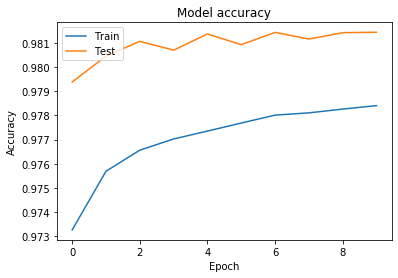

In [91]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

In [92]:
yprednn = modelo.predict(X_test)
yprednnb = (yprednn > 0.5)*1

In [93]:
metrics.roc_auc_score(y_test, yprednn)

0.9674778538922773

In [94]:
cmmnn = confusion_matrix(y_test, yprednnb)
cmmnn

array([[160995,   1273],
       [  1839,   3543]], dtype=int64)

In [95]:
print(classification_report(y_test, yprednnb))

              precision    recall  f1-score   support

         0.0       0.99      0.99      0.99    162268
         1.0       0.74      0.66      0.69      5382

    accuracy                           0.98    167650
   macro avg       0.86      0.83      0.84    167650
weighted avg       0.98      0.98      0.98    167650



##  XGBoost

In [96]:
xgb = XGBClassifier()

In [97]:
xgb.fit(X_train, y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.1, max_delta_step=0, max_depth=3,
              min_child_weight=1, missing=None, n_estimators=100, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)

In [98]:
ypredxgb = xgb.predict(X_test)

In [99]:
metrics.accuracy_score(y_test, ypredxgb)

0.979606322696093

In [100]:
metrics.roc_auc_score(y_test, ypredxgb)

0.7369782840499025

In [101]:
cmmxgb = confusion_matrix(y_test, ypredxgb)
cmmxgb

array([[161660,    608],
       [  2811,   2571]], dtype=int64)

In [102]:
print(classification_report(y_test, ypredxgb))

              precision    recall  f1-score   support

         0.0       0.98      1.00      0.99    162268
         1.0       0.81      0.48      0.60      5382

    accuracy                           0.98    167650
   macro avg       0.90      0.74      0.80    167650
weighted avg       0.98      0.98      0.98    167650



# 8 .- Análisis de resultados:

- Dado que por como se define un evento extremo la mayoria de los datos corresponde a situaciones normales, claramente hay una desbalance de clases y el accuracy no será el mejor indicador de cual modelo de los entrenados es el mejor.
- Como nos interesa predecir la presencia de caudal extremo para el día siguiente, si observamos el reporte de clasificación para los cuatro modelos podemos apreciar que la red neuronal predice con un 66% (recall) de exactitud un evento extremo, siendo el mejor de los cuatro modelos (considerando un accuracy similar para todos).

- El orden de mejor a peor será: RNN (0.66) - LogReg (0.51) - RandomForest(0.5) - XGBoost(0.48)

- La desventaja del modelo de redes neuronales es que tendrá mas falsas alarmas que los otros (predice evento extremo cuando no hay). Sin embargo, la diferencia con los otros modelos no es tan significativa como para que el modelo sea descartable por esta razon.

- En terminos de seguridad social es preferible tener un modelo levemente alarmista a uno que no es capaz de predecir los eventos extremos del día siguiente con exactitud.

- Se podrian mejorar los modelos incluyendo otras variables dependientes del lugar geografico, como el id de la cuenca o la estación de medición. Tiene el contra de tener que convertir estas variables categoricas a One-Hot-Encoding aumentando considerablemente el numero de features.

- Para ser modelos realizados con poco tiempo, me parece que tienen un rendimiento mas que aceptable. En particular, todavia queda espacio para tunear hiperparametros y elegir mejores features. 

Las variables mas importantes son (para XGBoost):


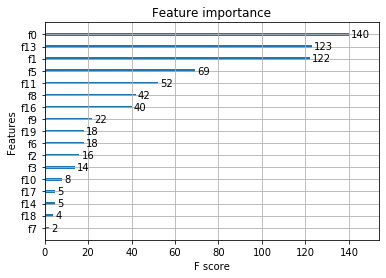

In [105]:
plot_importance(xgb)

Para Random Forest:

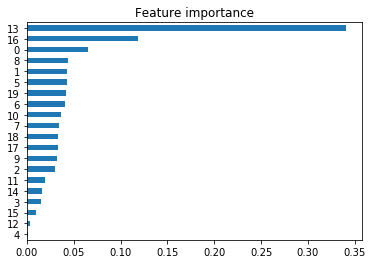

In [47]:
pd.Series(r.feature_importances_,).sort_values().plot(kind='barh', title='Feature importance')

In [106]:
features

['caudal',
 'precip_promedio',
 'temp_max_promedio',
 'precip_extremo',
 'temp_extremo',
 'caudal_Media7',
 'precip_Media7',
 'temp_Media7',
 'caudal_Media30',
 'precip_Media30',
 'temp_Media30',
 'precip_ext_acum7',
 'temp_ext_acum7',
 'caudal_ext_acum7',
 'precip_ext_acum30',
 'temp_ext_acum30',
 'caudal_ext_acum30',
 'precip_std30',
 'temp_std30',
 'caudal_std30']

Podemos ver que las variables mas importante en este caso son las variables relacionadas al caudal, como el caudal_extremo acumulado en los ultimos 7 dias y luego la precipitación promedio. Las siguientes variables importantes tambien tienen que ver con el caudal y las precipitaciones.

- ¿Existe una relación entre olas de calor y eventos extremos de caudal?

Según nuestros modelos, no existe una relación directa entre las olas de calor y los eventos de caudal extremo.


Un buen análisis sería volver a correr los modelos sin las variables historicas de caudal_extremo ya que claramente es mas facil predecir un evento extremo al dia siguiente si el día de hoy y ayer hubo este evento extremo.

# b)

Si quisieramos capturar un 70% de los eventos de caudal extremo, dado que nuestro modelo de red neuronal actualmente captura solo un 66%, debemos disminuir el threshold para lograr capturar más eventos. La desventaja es que la precisión del modelo va a disminuir ya que tambien clasificaremos erroneamente más eventos normales como extremos.


Si decidimos que un evento extremo es aquel que según el modelo tiene una probabilidad mayor a 43% entonces lograremos predecir un 70% de los eventos de caudal extremo, con una presición de 0.7 como se muestra a continuación.

In [107]:
yprednn = modelo.predict(X_test)
yprednnb = (yprednn > 0.43)*1

In [108]:
print(classification_report(y_test, yprednnb))

              precision    recall  f1-score   support

         0.0       0.99      0.99      0.99    162268
         1.0       0.70      0.70      0.70      5382

    accuracy                           0.98    167650
   macro avg       0.85      0.84      0.85    167650
weighted avg       0.98      0.98      0.98    167650



In [109]:
cmmxgb = confusion_matrix(y_test, yprednnb)
cmmxgb

array([[160671,   1597],
       [  1617,   3765]], dtype=int64)

Existen formalmente mejores formas de calcular esto, pero dado que nuestro modelo ya se acercaba bastante al 70%, bastó solo con un threshold de prueba para alcanzar lo pedido.